In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train) , (X_test,y_test) =keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

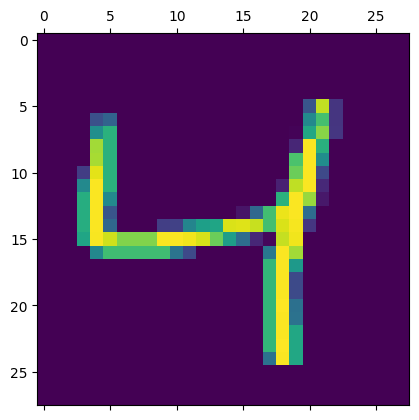

In [11]:
plt.matshow(X_train[2])

In [12]:
y_train[2]

4

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [34]:
X_train=X_train/255
X_test=X_test/255

In [35]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [36]:
X_train_flattened.shape

(60000, 784)

In [37]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [38]:
X_test_flattened.shape

(10000, 784)

In [39]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4675 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9263


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.9236


[0.2707834541797638, 0.9236000180244446]

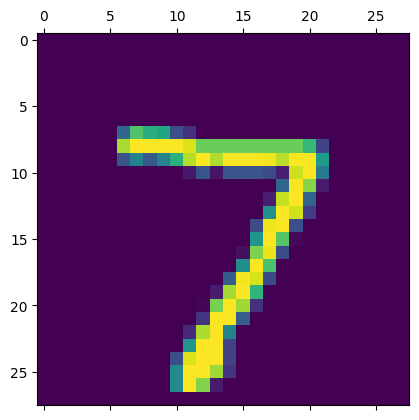

In [41]:
plt.matshow(X_test[0])

In [42]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [43]:
y_predicted[0]

array([2.3876760e-02, 2.6566480e-07, 3.6680795e-02, 9.5260155e-01,
       1.4467424e-03, 8.9551069e-02, 1.3961196e-06, 9.9973440e-01,
       7.0280880e-02, 7.3103154e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [46]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    5,    5,    3,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  916,   19,    6,    3,   12,   10,   46,    5],
       [   2,    0,   17,  929,    0,   20,    2,   11,   19,   10],
       [   2,    1,    6,    2,  883,    0,    8,    5,    8,   67],
       [   9,    2,    3,   37,    7,  773,   12,    8,   33,    8],
       [  11,    3,    6,    1,    7,   17,  907,    2,    4,    0],
       [   2,    5,   20,    8,    2,    0,    0,  947,    3,   41],
       [   7,    6,    6,   20,    9,   26,    8,   11,  864,   17],
       [  11,    6,    1,   10,   12,    3,    0,   15,    6,  945]])>

Text(95.72222222222221, 0.5, 'Truth')

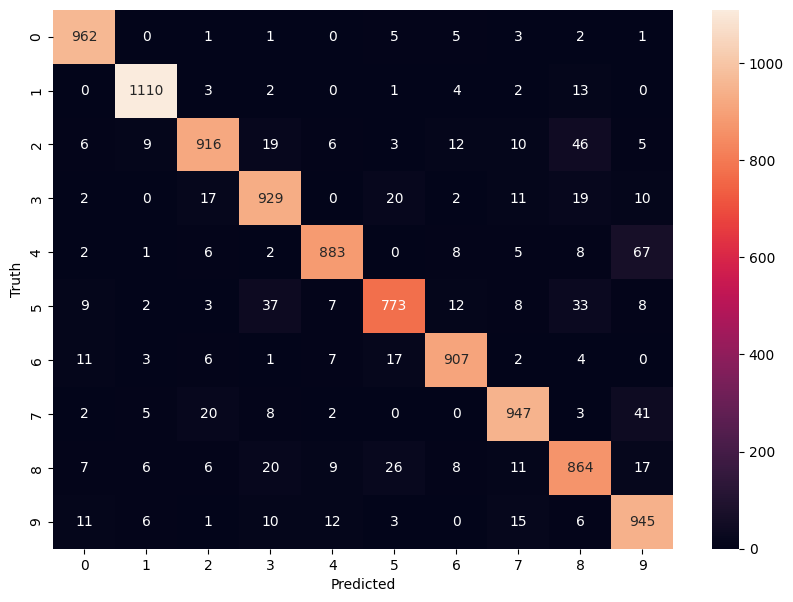

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2755 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1261 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0888 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0547 - accuracy: 0.9825


In [51]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 0.9748


[0.08103106170892715, 0.9747999906539917]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

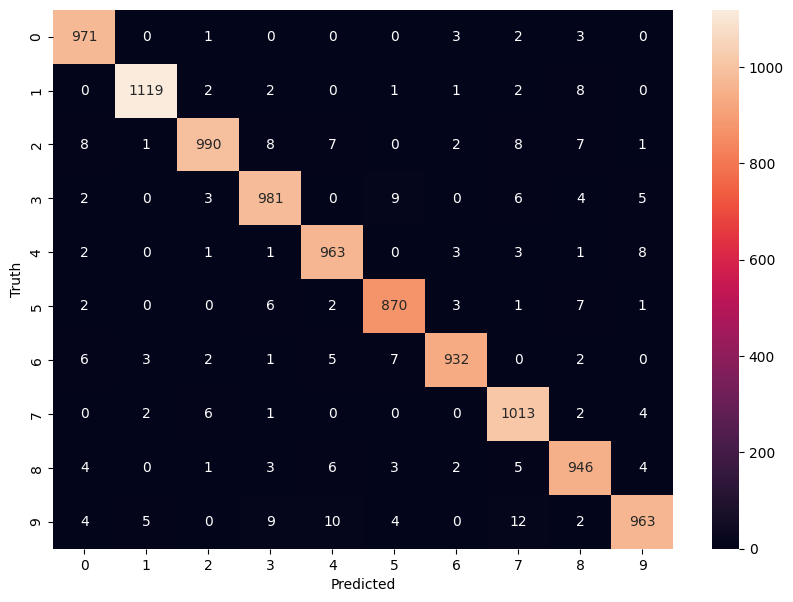

In [52]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2699 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1229 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0346 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0832 - accuracy: 0.9777


[0.08317587524652481, 0.9776999950408936]

SyntaxError: invalid syntax (4238376967.py, line 1)